In [1]:
!pip install pandas mplfinance ipywidgets

  Using cached mplfinance-0.12.10b0-py3-none-any.whl (75 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached matplotlib-3.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.7 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 KB 23.3 MB/s eta 0:00:00
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [2]:
import pandas as pd
import mplfinance as mpf
import logging
import os

# Set up basic logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Configuration
DATA_DIR = './stock_data/'

load data

In [3]:
TICKER = 'AAPL'  # Specify your ticker here

# Load CSV
csv_path = os.path.join(DATA_DIR, f'{TICKER}.csv')
try:
    df = pd.read_csv(csv_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    logger.info(f'Loaded {len(df)} records for {TICKER} from {csv_path}')
except Exception as e:
    logger.error(f'Error loading {TICKER}: {e}')
    df = pd.DataFrame()

df

2025-06-10 19:26:28,967 - INFO - Loaded 3534743 records for AAPL from ./stock_data/AAPL.csv


,timestamp,open,high,low,close,volume,vwap,transactions,otc
0,2003-09-10 08:00:00,0.3994,0.3994,0.3994,0.3994,5600.0,0.3994,1,NaN
1,2003-09-10 08:51:00,0.3982,0.3982,0.3982,0.3982,22400.0,0.3982,1,NaN
2,2003-09-10 09:13:00,0.3977,0.3977,0.3977,0.3977,67200.0,0.3977,1,NaN
3,2003-09-10 09:25:00,0.3973,0.3982,0.3973,0.3982,11200.0,0.3978,2,NaN
4,2003-09-10 09:29:00,0.3975,0.3975,0.3970,0.3970,207200.0,0.3971,10,NaN
...,...,...,...,...,...,...,...,...,...
3534738,2025-06-10 12:20:00,202.7800,202.8400,202.7800,202.8200,43091.0,202.8039,761,NaN
3534739,2025-06-10 12:21:00,202.8300,202.8300,202.6350,202.6350,65566.0,202.7233,996,NaN
3534740,2025-06-10 12:22:00,202.6350,202.6500,202.5300,202.5850,95415.0,202.5917,1322,NaN
3534741,2025-06-10 12:23:00,202.5700,202.6600,202.5300,202.5895,56668.0,202.6057,714,NaN


In [12]:
START_DATE = '2025-01-16'  # Specify start date (YYYY-MM-DD)
END_DATE = '2025-01-22'  # Specify end date (YYYY-MM-DD)

In [ ]:
# # advance the time by one week
# START_DATE = pd.to_datetime(START_DATE) + pd.Timedelta(days=7)
# END_DATE = pd.to_datetime(END_DATE) + pd.Timedelta(days=7)

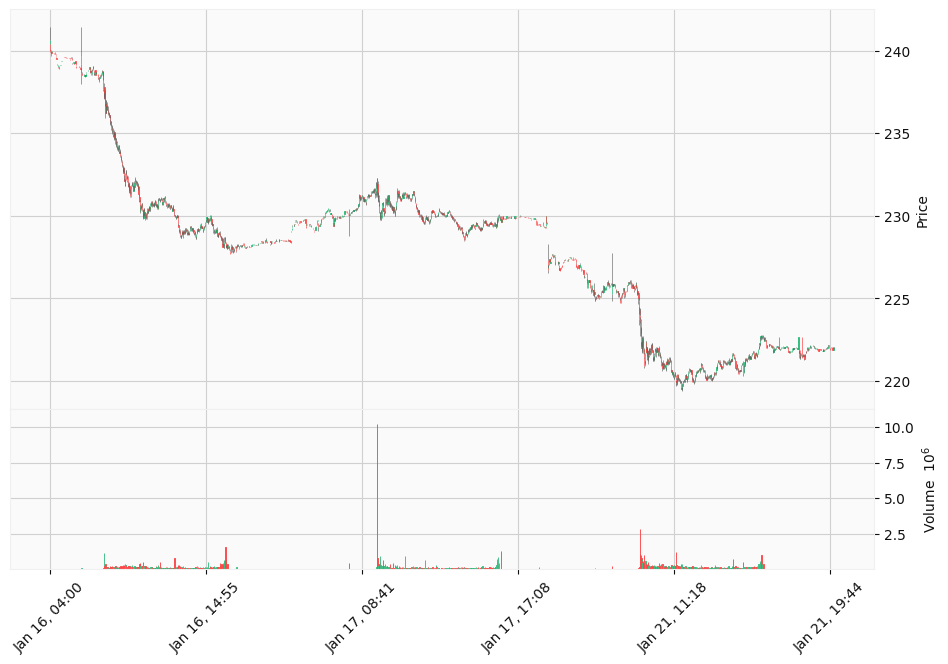

2025-06-10 19:29:28,169 - INFO - Plotted candlestick chart for AAPL from 2025-01-16 to 2025-01-22


In [13]:

# Filter by date range
df_slice = df[(df['timestamp'] >= START_DATE) & (df['timestamp'] <= END_DATE)]
# Prepare data for plotting
df_slice.set_index('timestamp', inplace=True)
df_slice = df_slice[['open', 'high', 'low', 'close', 'volume']]
# Plot candlestick chart
mpf.plot(
    df_slice,
    type='candle',
    style='yahoo',
    volume=True,
    warn_too_much_data=1000000,
    figsize=(12, 8),  # Set canvas size (width=12 inches, height=8 inches)
)
logger.info(f'Plotted candlestick chart for {TICKER} from {START_DATE} to {END_DATE}')